<a href="https://colab.research.google.com/github/Ishita1214/MBTI-Personality-Prediction/blob/main/MBPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
MBTI = pd.read_csv('/content/drive/MyDrive/data science /MBTI 500.csv')
MBTI.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


#Inspection and Cleaning

In [ ]:
MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
MBTI = MBTI.rename(columns={'type':'Personality Type'})

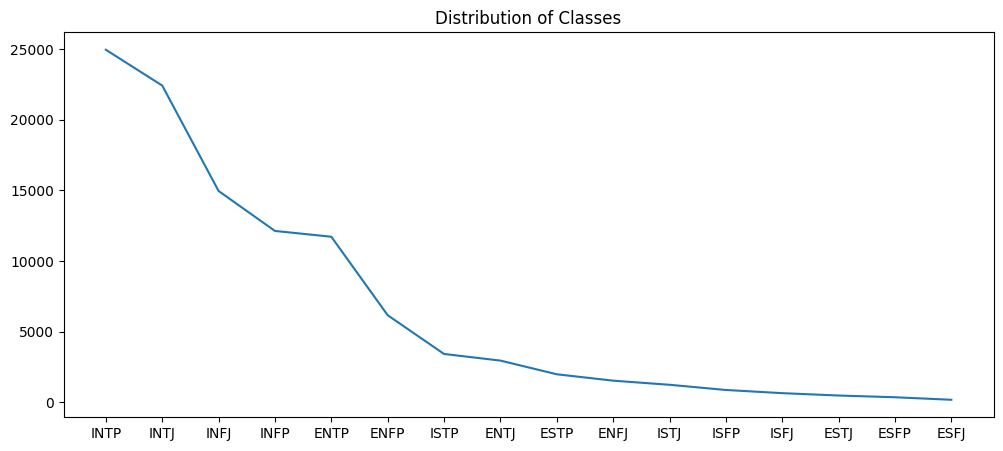

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(MBTI['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

#Some amount of class imbalance found.

In [ ]:
MBTI['Length'] = MBTI['posts'].apply(lambda x: len(x.split(' ')))
MBTI['Length'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: Length, dtype: float64

####As we can see the length of the sentences are not exactly 500 each.
####We will now get a list of all the words in all the posts.
####We will take a sample of the data since there are a lot of words present.

In [ ]:
MBTI_Pred = MBTI.sample(frac=0.1)
len(MBTI_Pred)

10607

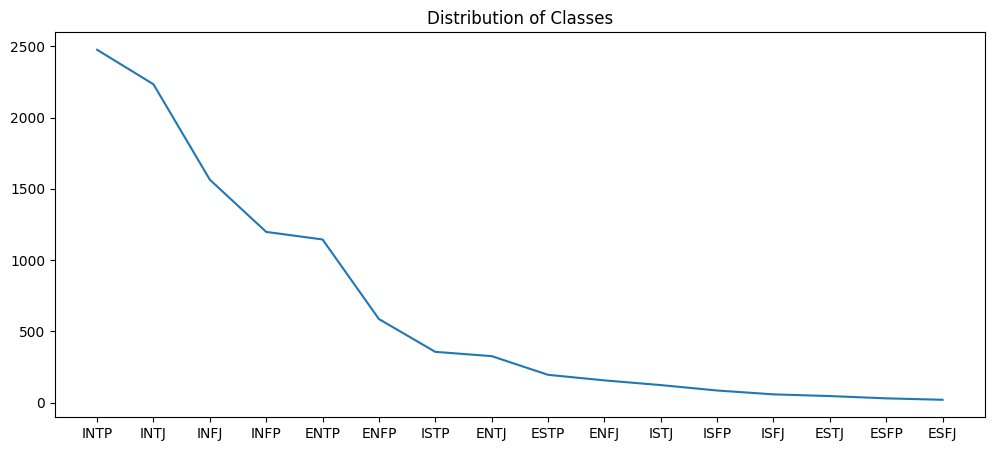

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(MBTI_Pred['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [ ]:
Words = list()
for i in list(MBTI_Pred['posts']):
    for j in i.split(' '):
        Words.append(j)

In [ ]:
from collections import Counter

In [ ]:
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

71747


,Frequency
Word,
like,69940
think,59360
people,55493
get,53255
make,40650


####Checking distribution of word frequencies

In [ ]:
Words_dic['Frequency'].describe()

count    71747.000000
mean        73.922115
std        865.623578
min          1.000000
25%          1.000000
50%          1.000000
75%          6.000000
max      69940.000000
Name: Frequency, dtype: float64

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Words_dic['Frequency'].quantile(i))

1.0
1.0
1.0
1.0
1.0
2.0
4.0
10.0
39.0


In [ ]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Words_dic['Frequency'].quantile(i))

47.0
59.0
74.0
97.0
133.0
192.0
296.0
532.0
1354.0


####Using the top 1 quantile of words based on frequency.

In [ ]:
Words_dic = Words_dic[Words_dic.Frequency>1341.6500000000087]
len(Words_dic)

724

####We will now apply these words to the entire dataset based on their presence in the posts.

In [ ]:
Final_Words = list(Words_dic.index)
for i in Final_Words:
    MBTI[i] = MBTI['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
MBTI.drop(['Length','posts'],axis=1,inplace=True)
MBTI.head()


,Personality Type,like,think,people,get,make,thing,know,feel,one,...,romantic,highly,benefit,trouble,interact,average,soon,remind,welcome,field
0,INTJ,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,INTJ,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,INTJ,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,0
3,INTJ,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,INTJ,1,1,1,1,1,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
len(MBTI)

106067

####EDA
####We will check which top 10 words for each of the different personality types.

In [ ]:
MBTI_EDA = MBTI.groupby('Personality Type').mean()
MBTI_EDA = MBTI_EDA.transpose()
MBTI_EDA.head()

Personality Type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
like,0.994785,0.998054,0.988494,0.996077,1.000000,0.994444,0.981328,0.986908,0.996391,0.998187,0.992286,0.994832,1.000000,0.998857,0.995173,0.994743
think,0.991525,0.991406,0.983756,0.993006,0.994475,0.994444,0.987552,0.965760,0.992649,0.991759,0.986445,0.991827,0.998462,0.998857,0.983910,0.987442
people,0.981095,0.982001,0.974958,0.982260,0.977901,0.986111,0.962656,0.966264,0.981354,0.979974,0.980604,0.977685,0.986154,0.980571,0.964602,0.979848
get,0.977836,0.992217,0.985110,0.986695,0.988950,0.986111,0.941909,0.975327,0.988171,0.985495,0.983993,0.983094,0.978462,0.980571,0.990346,0.989486
make,0.975880,0.976974,0.958376,0.971684,0.972376,0.969444,0.925311,0.923464,0.970928,0.965304,0.966424,0.965306,0.970769,0.974857,0.959775,0.957944


In [ ]:
len(MBTI_EDA)

724

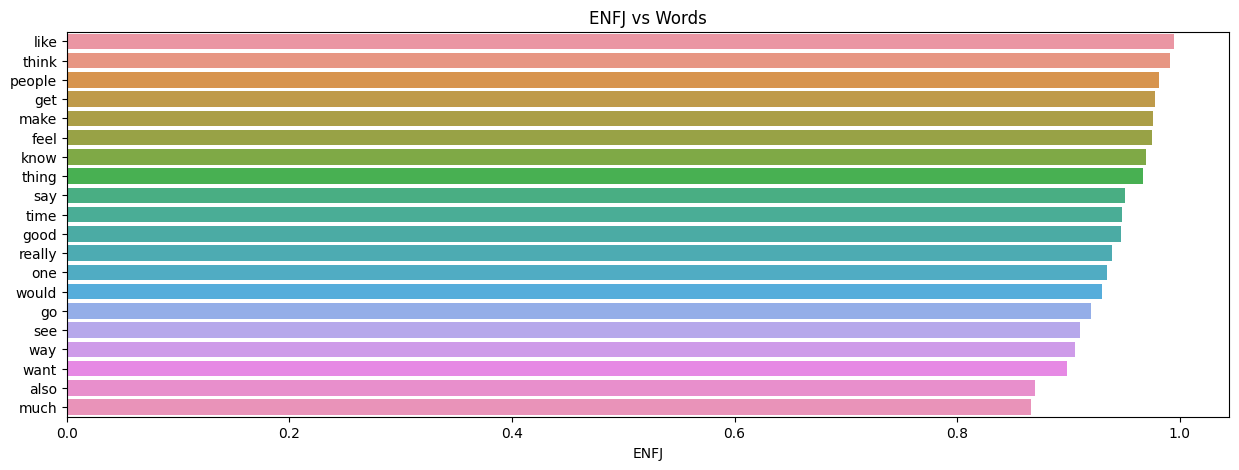

In [ ]:
MBTI_EDA_ENFJ = MBTI_EDA[['ENFJ']]
MBTI_EDA_ENFJ.sort_values('ENFJ',ascending=False,inplace=True)
MBTI_EDA_ENFJ = MBTI_EDA_ENFJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFJ.ENFJ,y=MBTI_EDA_ENFJ.index)
plt.title('ENFJ vs Words')
plt.show()

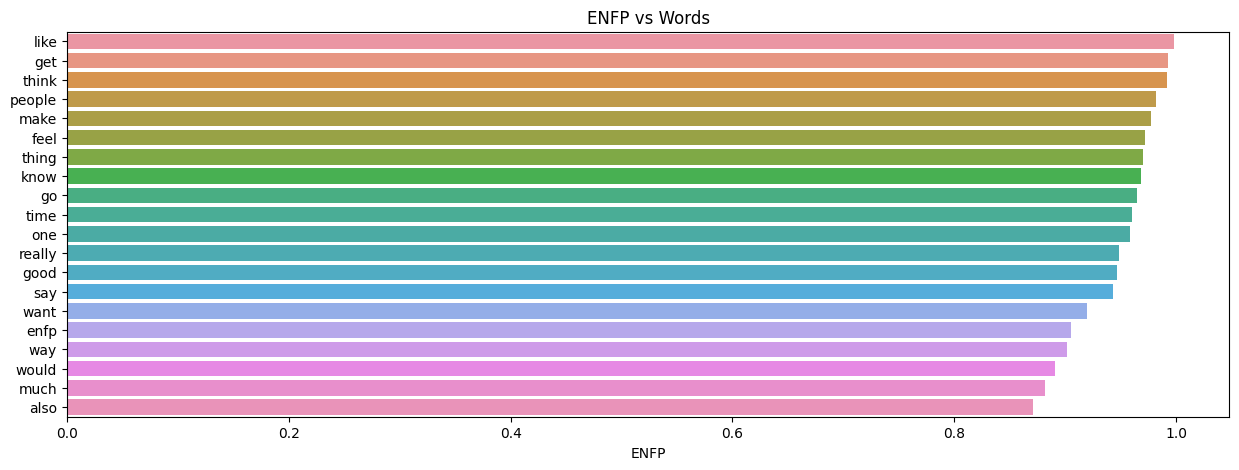

In [ ]:
MBTI_EDA_ENFP = MBTI_EDA[['ENFP']]
MBTI_EDA_ENFP.sort_values('ENFP',ascending=False,inplace=True)
MBTI_EDA_ENFP = MBTI_EDA_ENFP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFP.ENFP,y=MBTI_EDA_ENFP.index)
plt.title('ENFP vs Words')
plt.show()

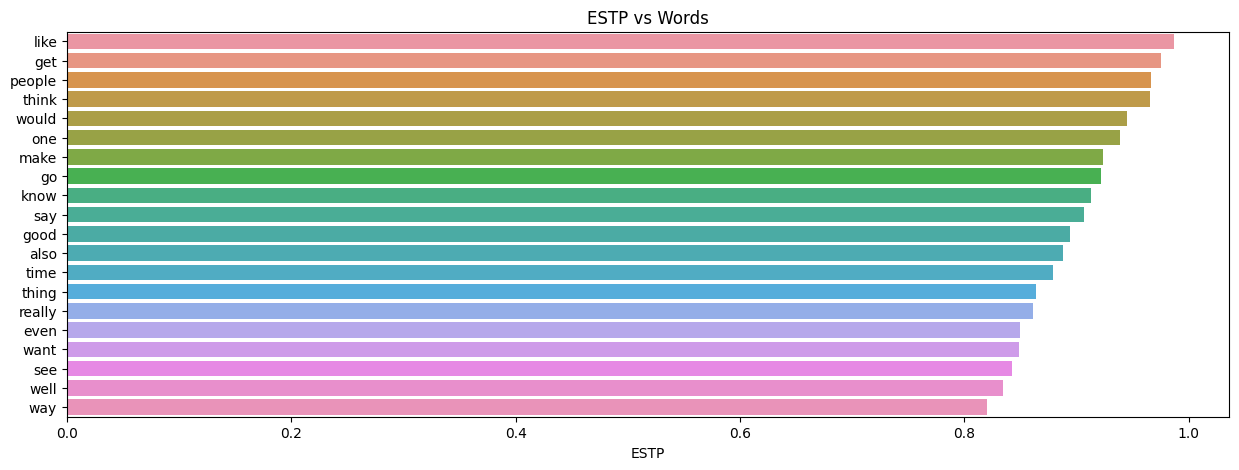

In [ ]:
MBTI_EDA_ESTP = MBTI_EDA[['ESTP']]
MBTI_EDA_ESTP.sort_values('ESTP',ascending=False,inplace=True)
MBTI_EDA_ESTP = MBTI_EDA_ESTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ESTP.ESTP,y=MBTI_EDA_ESTP.index)
plt.title('ESTP vs Words')
plt.show()

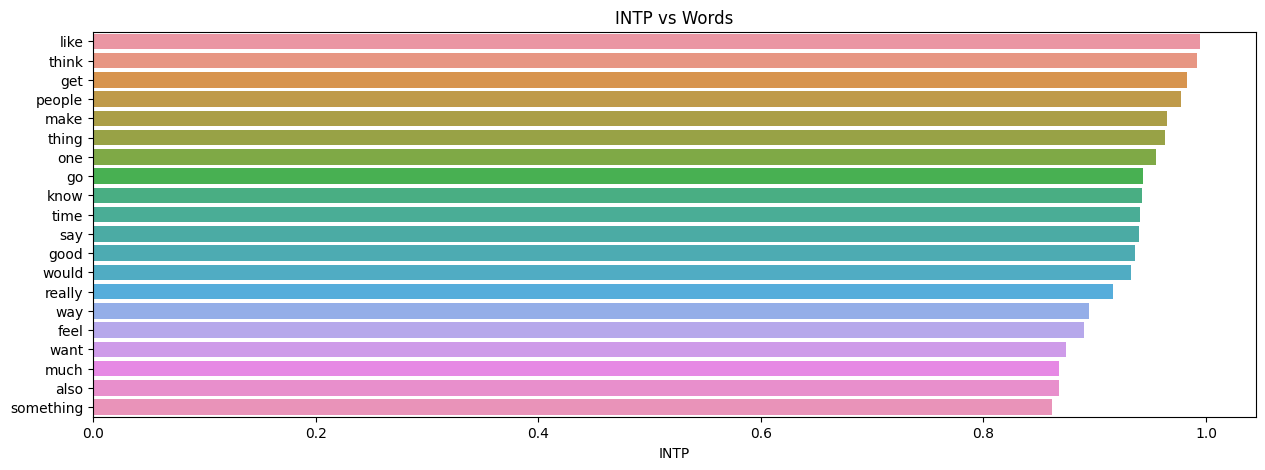

In [ ]:
MBTI_EDA_INTP = MBTI_EDA[['INTP']]
MBTI_EDA_INTP.sort_values('INTP',ascending=False,inplace=True)
MBTI_EDA_INTP = MBTI_EDA_INTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_INTP.INTP,y=MBTI_EDA_INTP.index)
plt.title('INTP vs Words')
plt.show()

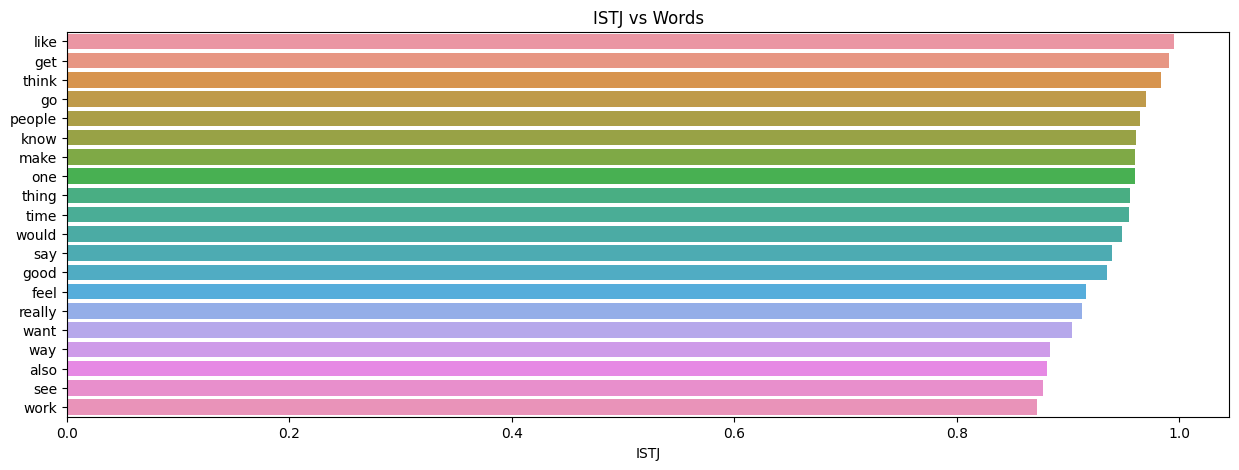

In [ ]:
MBTI_EDA_ISTJ = MBTI_EDA[['ISTJ']]
MBTI_EDA_ISTJ.sort_values('ISTJ',ascending=False,inplace=True)
MBTI_EDA_ISTJ = MBTI_EDA_ISTJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ISTJ.ISTJ,y=MBTI_EDA_ISTJ.index)
plt.title('ISTJ vs Words')
plt.show()


####We get a chart of the most probable words being used in the posts of some of the personality types.
####Model building
####Now we will build a model to predict each personality type from the words used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
Personalities = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']
Feature_Importance = pd.DataFrame()

####Taking only a small sample of the data for training since we have a lot of data.

In [ ]:
MBTI =  MBTI.sample(frac=0.05)

In [ ]:
for i in Personalities:
    Temp = MBTI.copy()
    Temp['Personality Type'] = Temp['Personality Type'].apply(lambda x: 1 if x==i else 0)
    X = Temp.drop('Personality Type',axis=1)
    y = Temp['Personality Type']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

    Model = RandomForestClassifier(n_jobs=-1,random_state=100,class_weight='balanced')

    params = {'n_estimators':[100],
              'max_depth':[3,5,7,10,12,15],
              'max_features':[0.05,0.1,0.15,0.2],
              'criterion':["gini","entropy"]}

    grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
    grid_search.fit(X_train,y_train)

    Model_best = grid_search.best_estimator_

    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)

    print(i)
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))


    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
INFP
Train Accuracy : 0.9827586206896551
Test Accuracy : 0.9226901319924575
Fitting 5 folds for each of 48 candidates, totalling 240 fits
INFJ
Train Accuracy : 0.9760237068965517
Test Accuracy : 0.9088623507228158
Fitting 5 folds for each of 48 candidates, totalling 240 fits
INTP
Train Accuracy : 0.9423491379310345
Test Accuracy : 0.8654934003771213
Fitting 5 folds for each of 48 candidates, totalling 240 fits
INTJ
Train Accuracy : 0.9558189655172413
Test Accuracy : 0.8742928975487115
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ENTP
Train Accuracy : 0.9781788793103449
Test Accuracy : 0.923318667504714
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ENFP
Train Accuracy : 0.9913793103448276
Test Accuracy : 0.9547454431175362
Fitting 5 folds for each of 48 candidates, totalling 240 fits
ISTP
Train Accuracy : 0.9927262931034483
Test Accuracy : 0.9629164047768699
Fitting 5 folds for each of 48 cand

In [ ]:
import sklearn.metrics

accuracy = sklearn.metrics.accuracy_score(y_train)

print(f"Accuracy: {accuracy * 100:.2f}%")

NameError: name 'y_train' is not defined

In [ ]:
Feature_Importance.head()

,Feature,INFP,INFJ,INTP,INTJ,ENTP,ENFP,ISTP,ISFP,ENTJ,ISTJ,ENFJ,ISFJ,ESTP,ESFP,ESFJ,ESTJ
0,like,0.000000,0.000000,0.000000,0.000367,0.000000,9.157348e-19,0.0,0.000000e+00,0.000000,0.000000e+00,4.341918e-17,0.000000e+00,0.000000,0.000000,0.0,0.0
1,think,0.000061,0.000090,0.000052,0.000179,0.000134,8.128780e-06,0.0,0.000000e+00,0.000000,2.576549e-03,1.950978e-17,0.000000e+00,0.000000,0.000000,0.0,0.0
2,people,0.000149,0.000129,0.000348,0.000296,0.000118,5.029213e-04,0.0,0.000000e+00,0.000231,1.073192e-18,9.036551e-17,7.773731e-17,0.000000,0.000000,0.0,0.0
3,get,0.000128,0.000137,0.000211,0.000012,0.000535,0.000000e+00,0.0,8.858481e-18,0.000181,0.000000e+00,0.000000e+00,0.000000e+00,0.000531,0.000000,0.0,0.0
4,make,0.000437,0.000162,0.000515,0.000470,0.000155,4.219076e-04,0.0,6.035050e-04,0.000000,0.000000e+00,7.029147e-05,0.000000e+00,0.000209,0.005021,0.0,0.0


####As we can see most of the models have pretty good accuracy scores on both the test and train sets.